In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
import warnings
warnings.simplefilter("ignore")

In [196]:
df = pd.read_csv('train.csv')

In [197]:
df.drop(columns=['Booking_ID'], inplace=True)
df.drop_duplicates(inplace=True)

In [198]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [199]:
cat_cols = ['type_of_meal_plan', 
            'required_car_parking_space', 
            'market_segment_type', 
            'repeated_guest',
            'room_type_reserved',
            'booking_status']

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights','lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

In [200]:
data = df.copy()


## Univariate analysis


In [201]:
def num_plot_dist(df, num_features):
    fig, axes = plt.subplots(len(num_features), 2, figsize = (15, len(num_features)*5))
    if len(num_features) == 1:
        axes = [axes]
    for i, column in enumerate(num_features):
        sns.histplot(data = df, x=column, ax = axes[i][0], kde = True, palette = "Blues")
        axes[i][0].set_title(f'Distribution of {column}')

        sns.boxplot(data = df, x=column, ax = axes[i][1], palette = "Blues")
        axes[i][1].set_title(f'Boxplot of {column}')

    plt.tight_layout()
    plt.show()

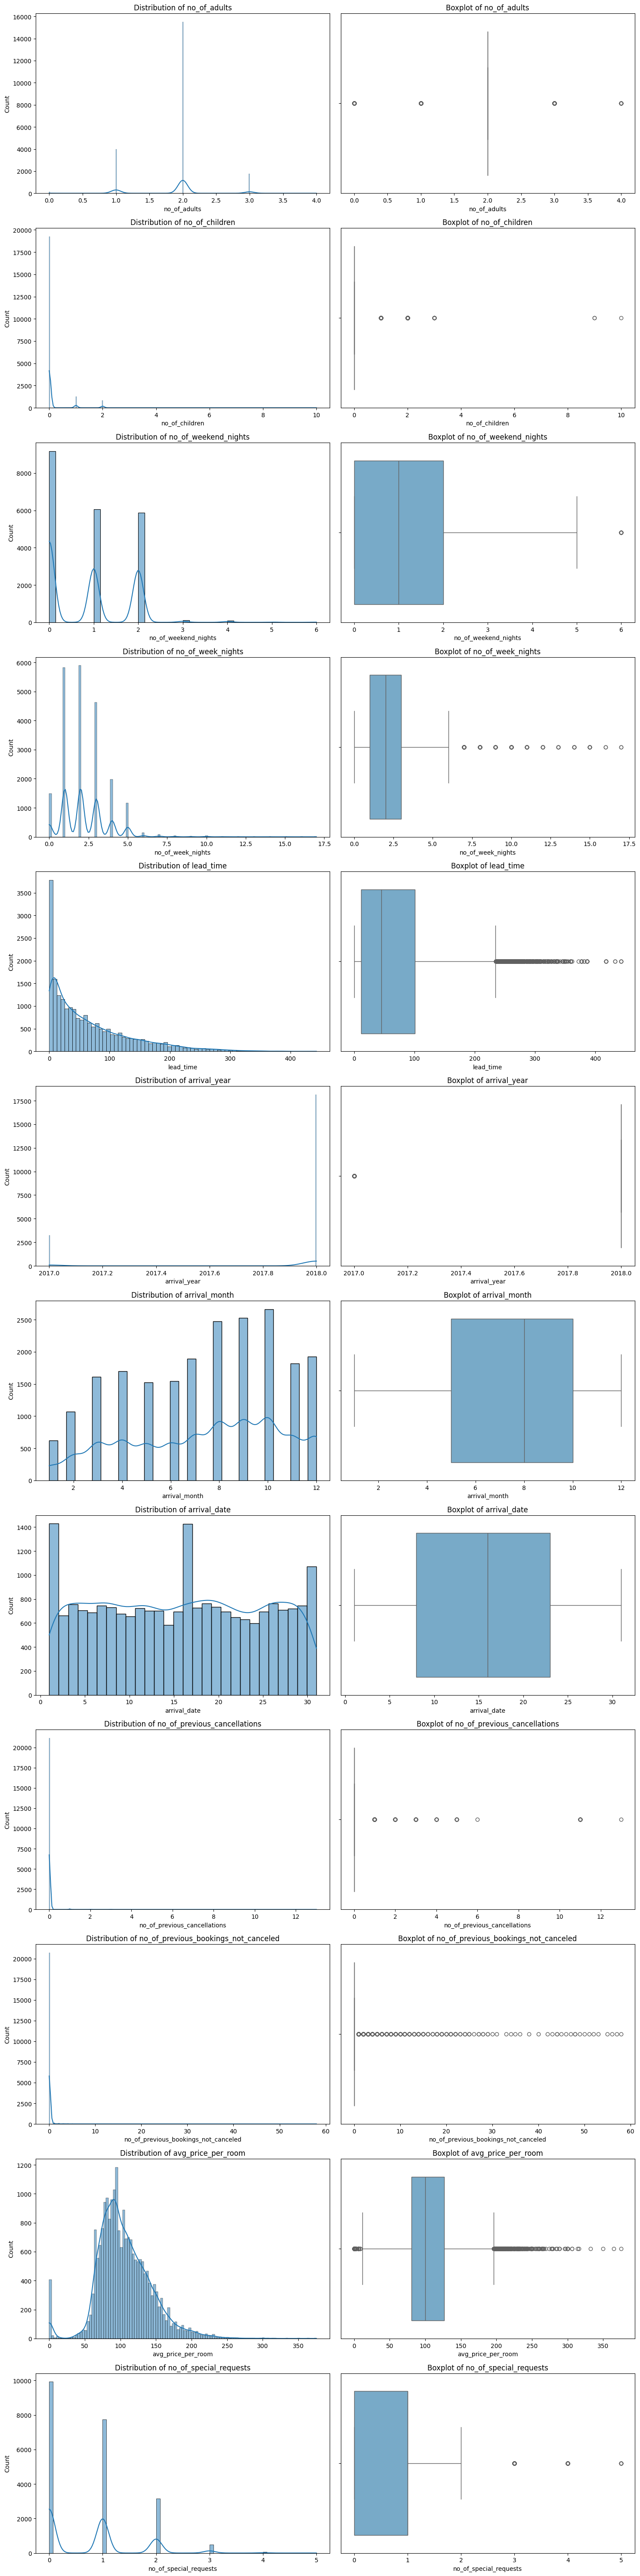

In [202]:
num_plot_dist(data, num_cols)

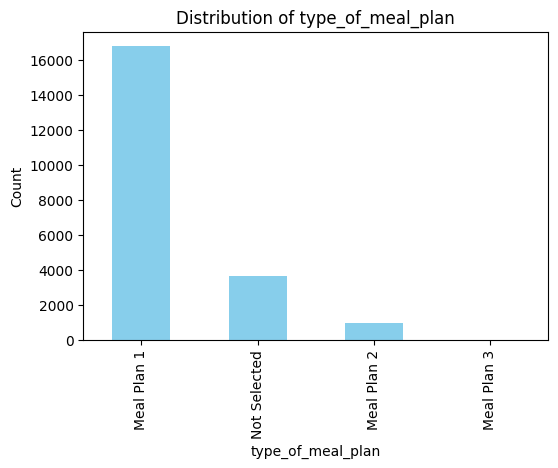

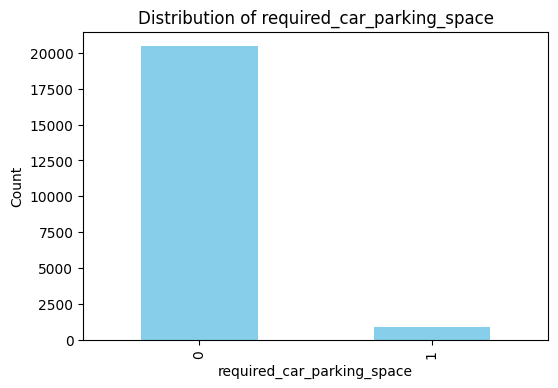

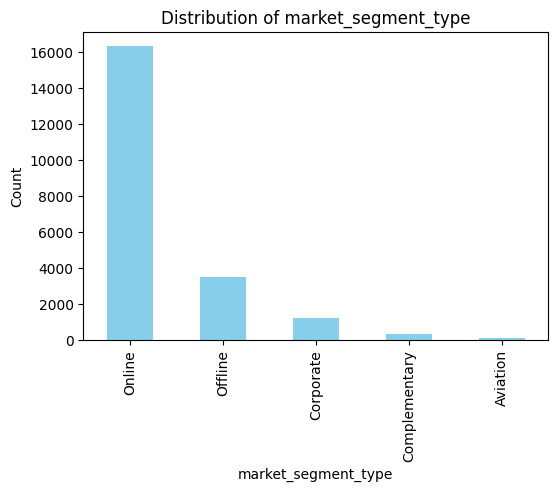

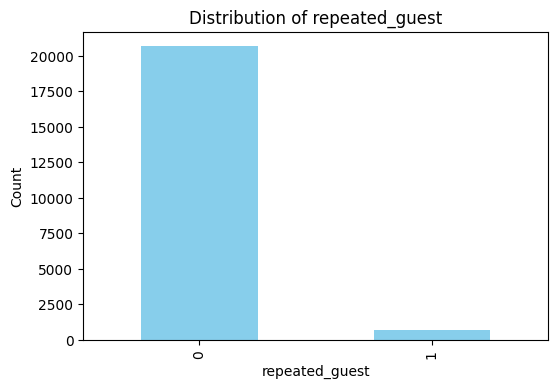

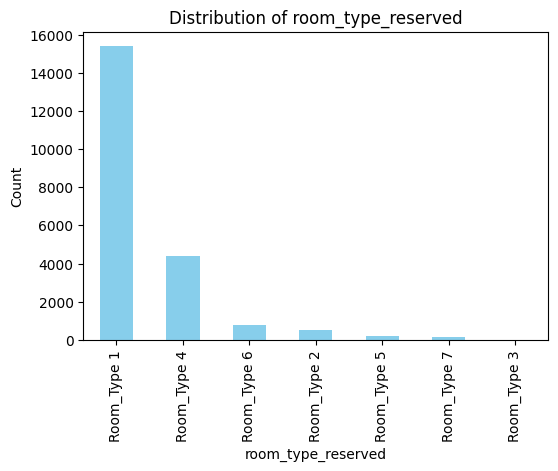

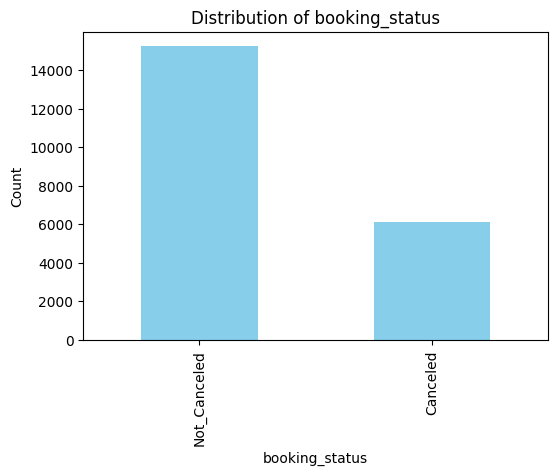

In [203]:
for cat_feature in cat_cols:
    plt.figure(figsize=(6,4))
    data[cat_feature].value_counts().plot(kind='bar', color = "skyblue")
    plt.title(f'Distribution of {cat_feature}')
    plt.xlabel(cat_feature)
    plt.ylabel('Count')
    plt.show()


## Bivariate anaylysis


In [204]:
def plot_bivariate_num(df, target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots + 1)//2
    fig, axes = plt.subplots(num_rows, 2, figsize = (15, num_rows*5))
    axes = axes.flatten()

    for i, column in enumerate(num_features):
        sns.boxplot(data = df, x=target, y=column, ax = axes[i], palette = "Blues")
        axes[i].set_title(f'{column} vs {target}')

    plt.tight_layout()
    plt.show()
    

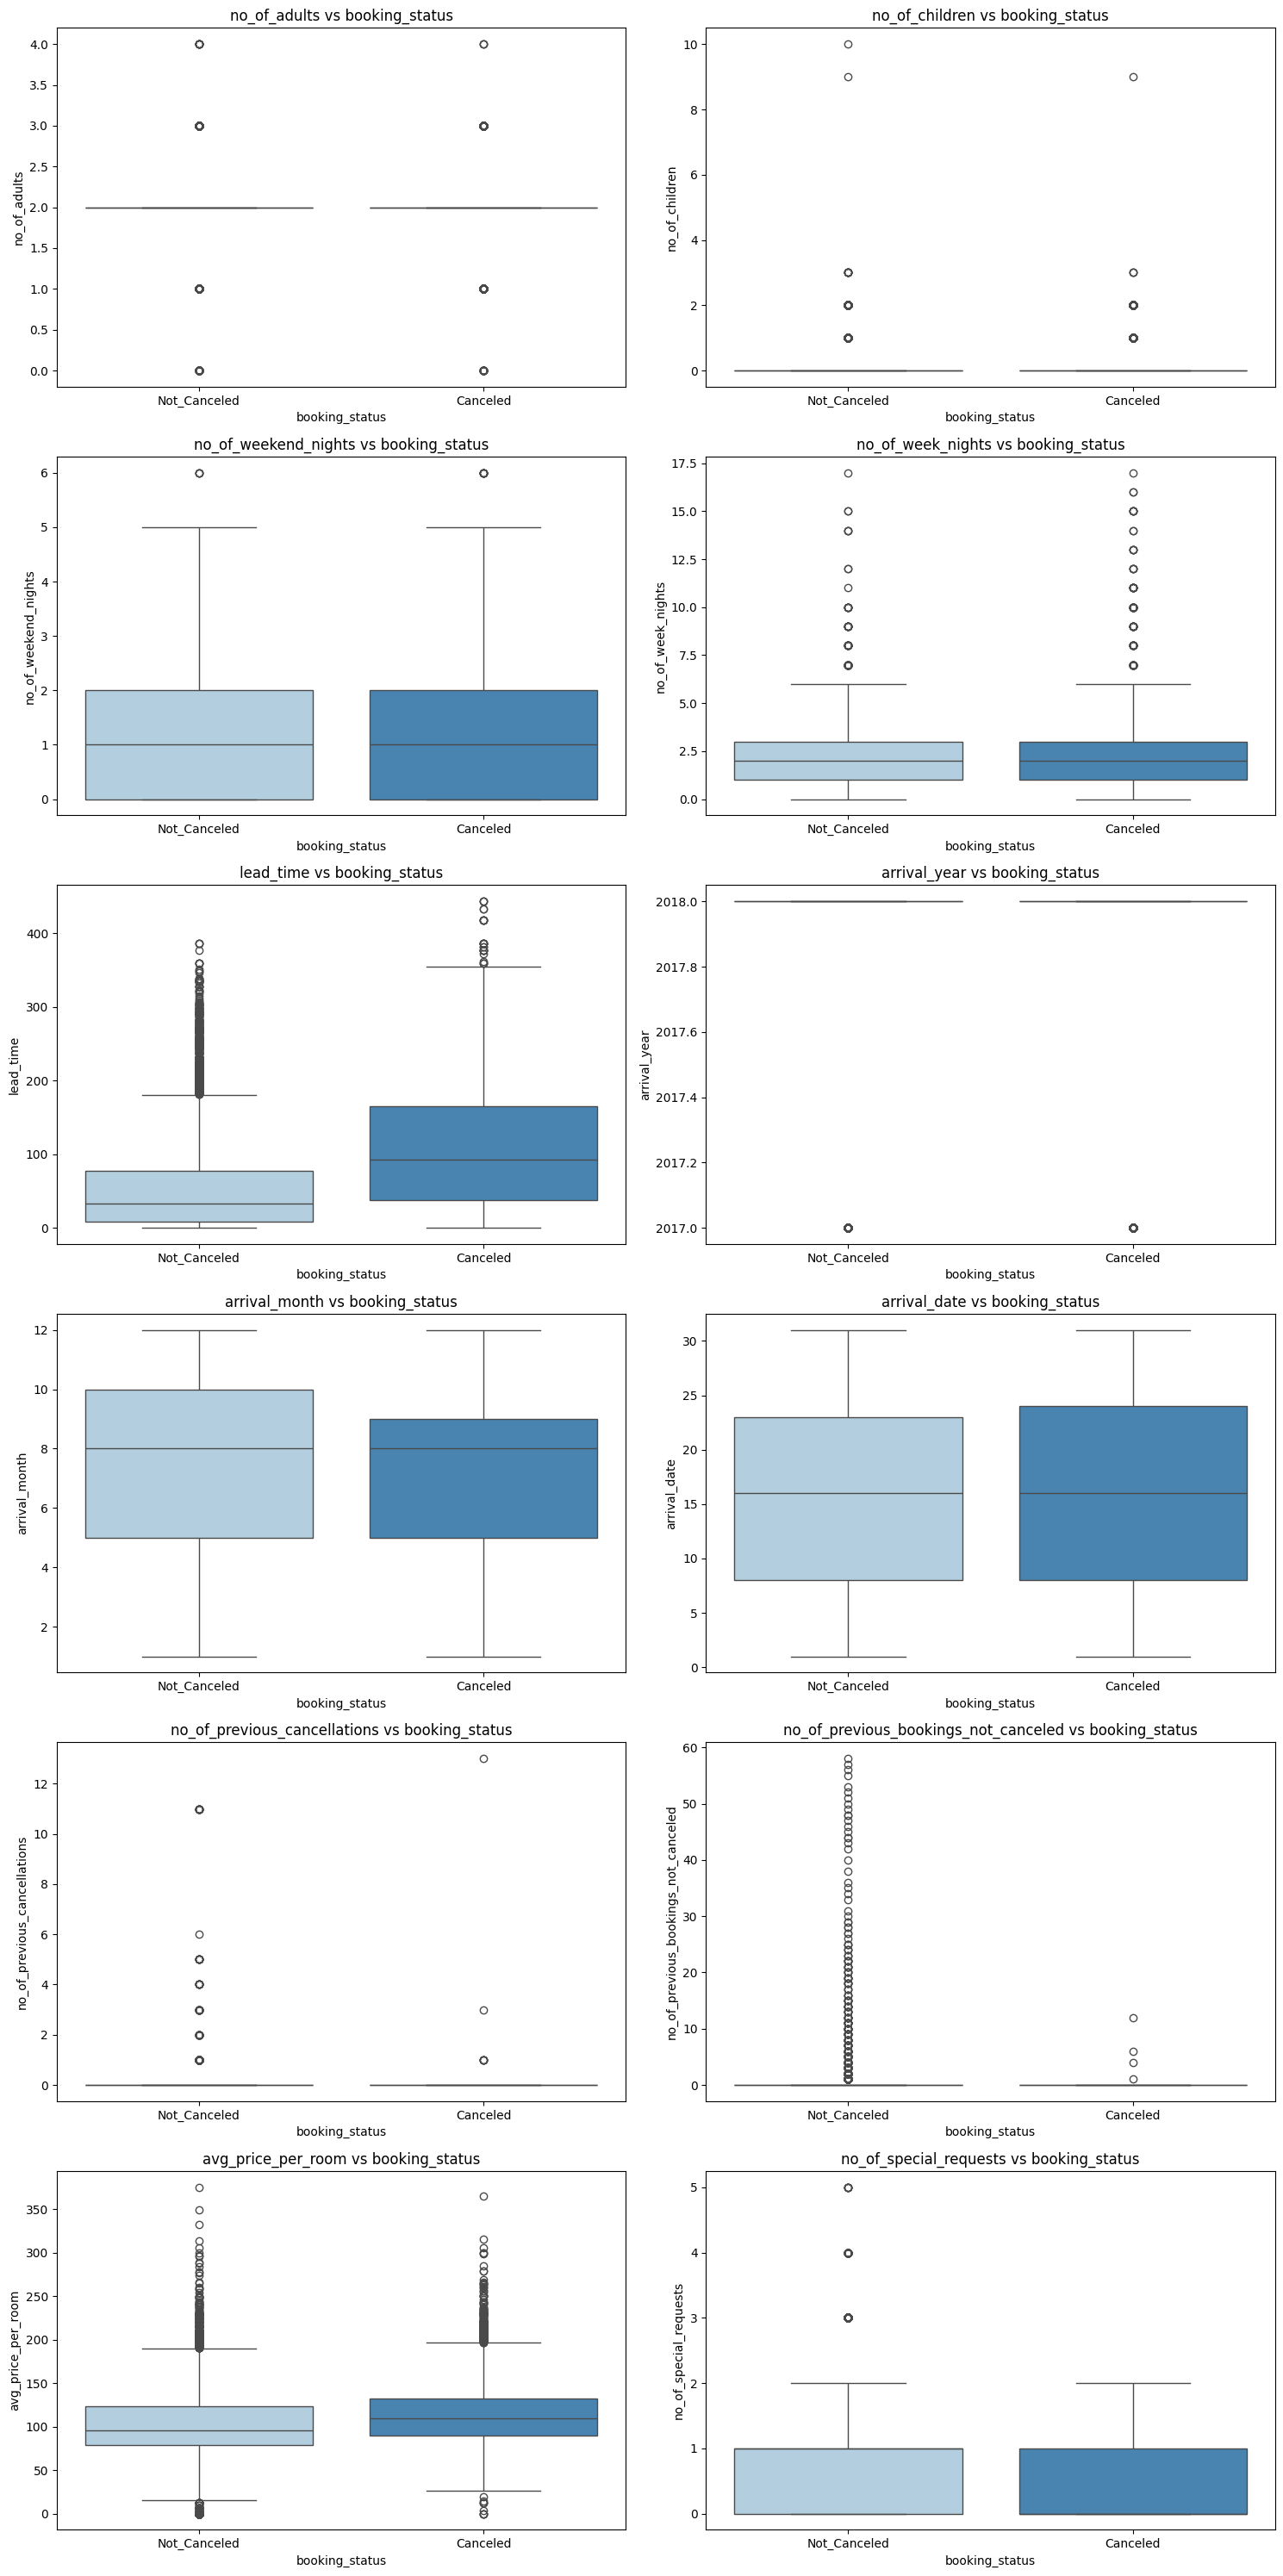

In [205]:
plot_bivariate_num(data, 'booking_status', num_cols)

In [206]:
def plot_bivariat_cat(df, target, cat_features):
    num_plots = len(cat_features)
    num_rows = (num_plots + 1)//2
    fig, axes = plt.subplots(num_rows, 2, figsize = (15, num_rows*5))
    axes = axes.flatten()

    for i, column in enumerate(cat_features):
        sns.countplot(data = df, x=column, hue=target, ax = axes[i], palette = "Set2")
        axes[i].set_title(f'{column} vs {target}')
        axes[i].legend(title=target)

    plt.tight_layout()
    plt.show()

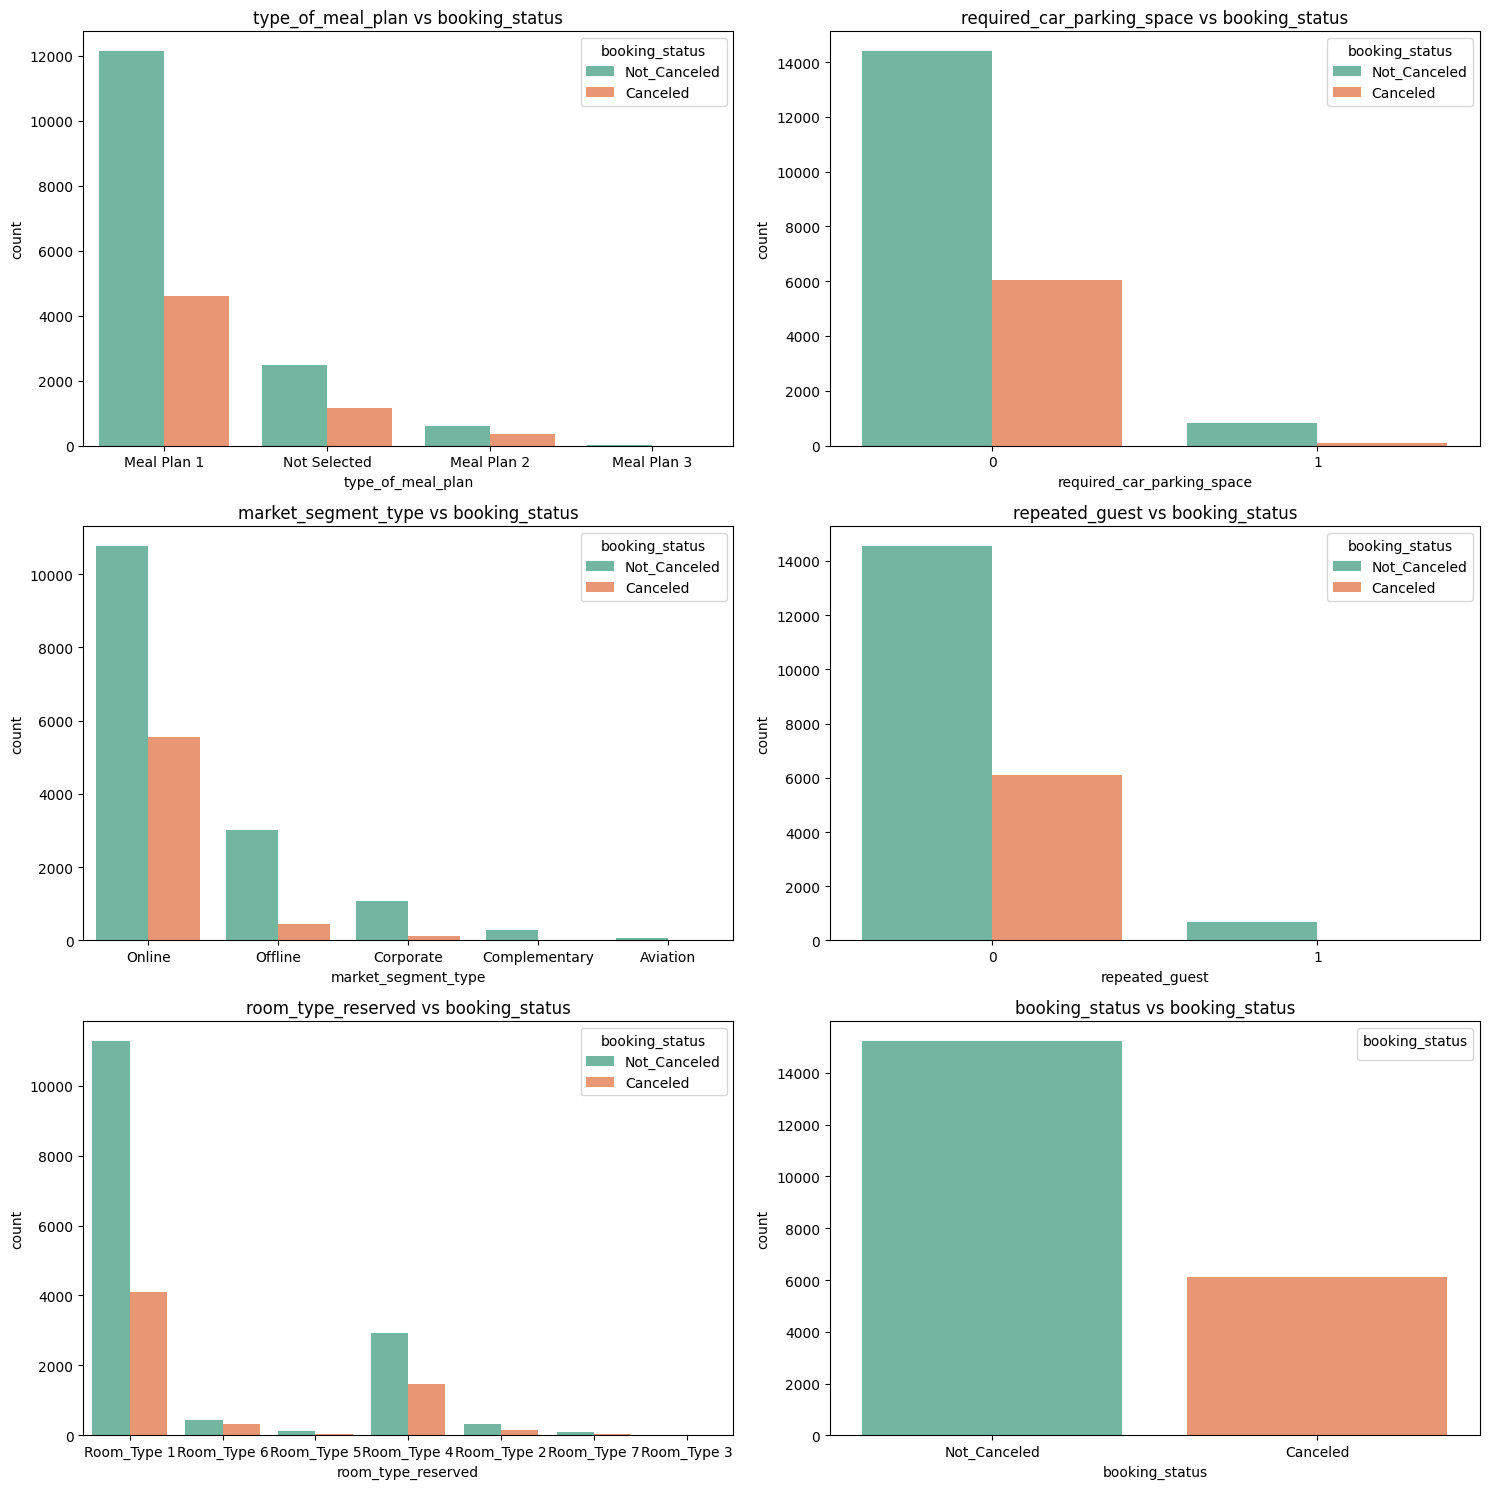

In [207]:
plot_bivariat_cat(data, 'booking_status', cat_cols)

## Data processing

In [208]:
from sklearn.preprocessing import LabelEncoder

In [209]:
label_encoder = LabelEncoder()

mappings={}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(data[col])
    mappings[col] = {label:code for label,code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}

In [210]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [211]:
X = add_constant(df)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

## NO multicoloniarity

In [212]:
corr =df.corr()

<Axes: >

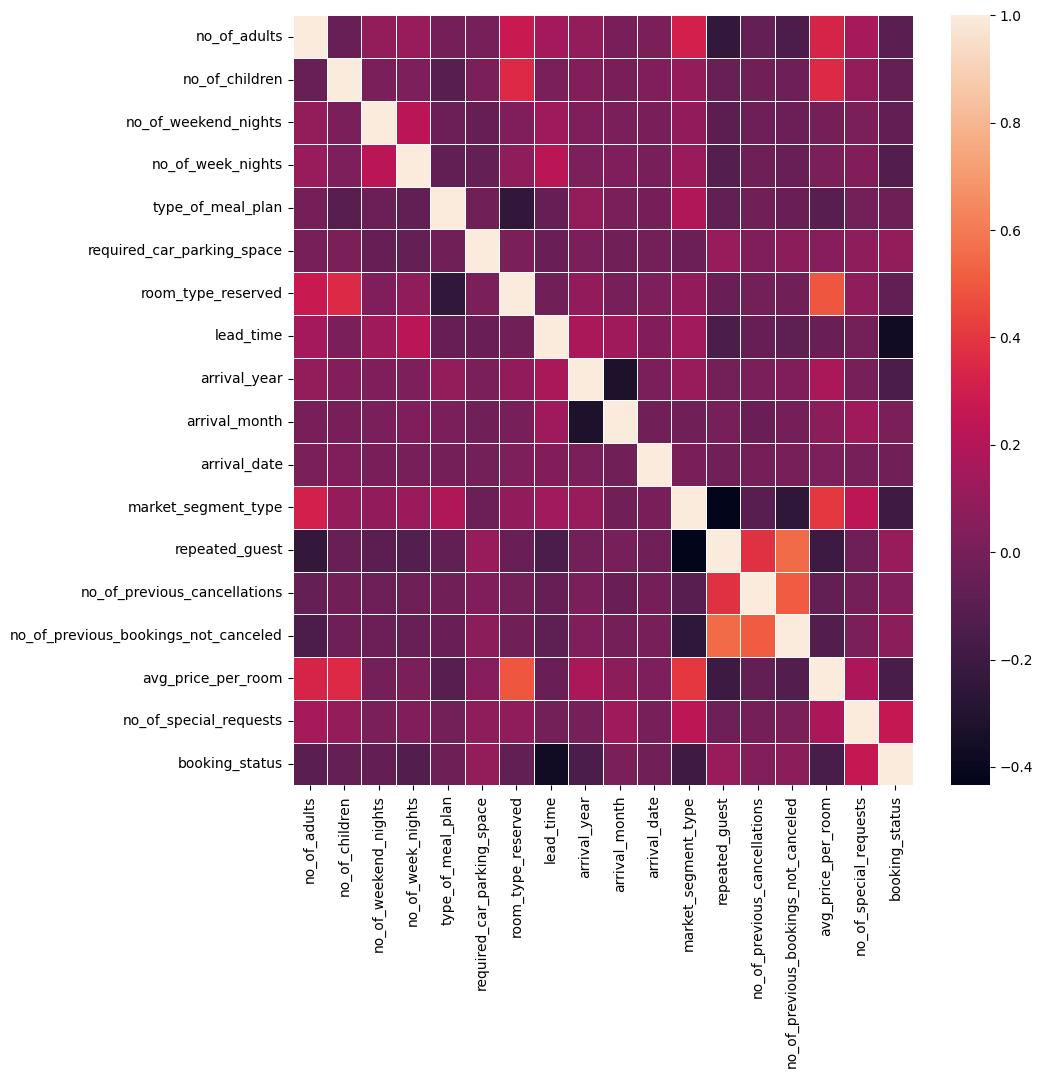

In [213]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, linewidths=0.5)

## SKEWNESS

In [214]:
skewness = df.skew()

In [215]:
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [216]:
for column in df.columns:
    if skewness[column] > 5:
        df[column] = np.log1p(df[column])

### Handle imbalanced data with oversampling

In [217]:
X = df.drop('booking_status', axis=1)
y = df['booking_status']

In [218]:
from imblearn.over_sampling import SMOTE

In [219]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)


In [220]:
balanced_df = pd.concat([X_res, y_res], axis=1)

In [221]:
df = balanced_df.copy()

## FEATURE SELECTIONS

In [222]:
from sklearn.ensemble import RandomForestClassifier

In [223]:
X = df.drop('booking_status', axis=1)
y = df['booking_status']

In [224]:
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [225]:
feature_importance = model.feature_importances_

In [226]:
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})  

In [227]:
top_features_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [228]:
top_10_features = top_features_importance_df["Feature"].head(10).values

top_10_df = df[top_10_features.tolist() + ['booking_status']]

In [231]:
top_10_features

array(['lead_time', 'no_of_special_requests', 'avg_price_per_room',
       'arrival_month', 'arrival_date', 'market_segment_type',
       'no_of_week_nights', 'no_of_weekend_nights', 'type_of_meal_plan',
       'room_type_reserved'], dtype=object)

In [232]:
df = top_10_df.copy()

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [148]:
X = df.drop('booking_status', axis=1)
y = df['booking_status']

In [149]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)   

In [151]:
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

In [ ]:
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "ROC-AUC": []
}

In [153]:
for model_name, classifier in classifiers.items():
    classifier.fit(Xtrain, ytrain)
    ypred = classifier.predict(Xtest)
    yprob = classifier.predict_proba(Xtest)[:, 1]

    accuracy = accuracy_score(ytest, ypred)
    precision = precision_score(ytest, ypred)
    recall = recall_score(ytest, ypred)
    f1 = f1_score(ytest, ypred)
    roc_auc = roc_auc_score(ytest, yprob)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1-Score"].append(f1)
    metrics["ROC-AUC"].append(roc_auc)

[LightGBM] [Info] Number of positive: 12185, number of negative: 12184
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000704 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 24369, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500021 -> initscore=0.000082
[LightGBM] [Info] Start training from score 0.000082


In [154]:
metrics_df = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"])
metrics_df["Model"] = metrics["Model"]
metrics_df["Accuracy"] = metrics["Accuracy"]
metrics_df["Precision"] = metrics["Precision"]
metrics_df["Recall"] = metrics["Recall"]
metrics_df["F1-Score"] = metrics["F1-Score"]
metrics_df["ROC-AUC"] = metrics["ROC-AUC"]

In [156]:
metrics_df.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
1,Random Forest,0.886591,0.887208,0.885752,0.886479,0.951833
8,XGBoost,0.870507,0.867231,0.874918,0.871057,0.943250
9,LightGBM,0.862137,0.849715,0.879842,0.864516,0.937083
5,Decision Tree,0.837190,0.846024,0.824360,0.835052,0.838618
2,Gradient Boosting,0.829312,0.815013,0.851937,0.833066,0.914616
3,AdaBoost,0.791564,0.798387,0.780039,0.789107,0.874208
7,KNN,0.781717,0.848497,0.685817,0.758533,0.859047
0,Logistic Regression,0.769408,0.792513,0.729810,0.759870,0.847675
6,Naive Bayes,0.764648,0.789304,0.721930,0.754115,0.844346
4,Support Vector Machine,0.723781,0.731252,0.707485,0.719172,0.819129


## train random forest model

In [157]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [158]:
X = df.drop('booking_status', axis=1)
y = df['booking_status']

In [159]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)   

In [161]:
rf = RandomForestClassifier(random_state=42)
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}


In [162]:
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=5, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

In [163]:
random_search.fit(Xtrain, ytrain)

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'max_depth': <scipy.stats....t 0x114034190>, 'min_samples_leaf': <scipy.stats....t 0x112a4ec40>, 'min_samples_split': <scipy.stats....t 0x113df0a50>, ...}"
,n_iter,5
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [164]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [167]:
best_rf_model = random_search.best_estimator_

In [168]:
y_pred_best = best_rf_model.predict(Xtest)

In [171]:
accuracy = accuracy_score(ytest, y_pred_best)
precision = precision_score(ytest, y_pred_best)
recall = recall_score(ytest, y_pred_best)
f1 = f1_score(ytest, y_pred_best)

## SAVE MODEL


In [175]:
import joblib

In [177]:
joblib.dump(best_rf_model, 'random_forest.pkl')

['random_forest.pkl']

In [180]:
rf_best = joblib.load('random_forest.pkl')

In [183]:
new_data = np.array([19, 1, 148.0, 12, 30, 4, 2, 0, 0, 3])

In [186]:
rf_best.predict(new_data.reshape(1, -1))

array([1])

In [182]:
Xtrain[0:1]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
5872,19,1,148.0,12,30,4,2,0,0,3
